# Exercise 6.2 Exploring Relationships

## This script contains the following:

**1. Importing Visualization Libraries and Cleaned Data**

**2. Data Checks & Manipulation**

**3. Exploring Relationships**

    Correlation Matrix Heatmap
    
    Scatterplot
    
    Pair Plot
    
    Categorical Plot
    
    

### 1. Importing Visualization Libraries and Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'/Users/mitchellkubik/Desktop/Advanced Analytics & Dashboard Design/Assignment Data'

In [4]:
# Import Data

df = pd.read_csv(os.path.join(path, 'Prepared EV Data', 'df_ev_cleaned.csv'), index_col = False)

In [5]:
# Check the output

df

,Unnamed: 0,vin,county,city,state,postal_code,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,dol_v_id,v_location,electric_utility,2020_census_tract
0,0,2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,1,2C4RC1N7XL,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,2,KNDC3DLCXN,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,159462,KM8JBDA2XP,Skamania,Underwood,WA,98651,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,235949514,POINT (-121.5312858 45.7348285),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF S...,5.305995e+10
159454,159463,1G1FZ6S02M,Skagit,Bow,WA,98232,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,148544168,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
159455,159464,YV4H60CX2P,King,Sammamish,WA,98029,2023,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,240200754,POINT (-121.9993659 47.5484866),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
159456,159465,5YJ3E1EA7K,Whatcom,Bellingham,WA,98225,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,156680590,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


## 2. Data Checks & Manipulation

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head(1)

,vin,county,city,state,postal_code,year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,dol_v_id,v_location,electric_utility,2020_census_tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10


In [10]:
df.dtypes

vin                   object
county                object
city                  object
state                 object
postal_code            int64
year                   int64
make                  object
model                 object
ev_type               object
cafv_eligibility      object
electric_range         int64
base_msrp              int64
dol_v_id               int64
v_location            object
electric_utility      object
2020_census_tract    float64
dtype: object

In [18]:
# Change dtypes of necessary variables

df[['latitude', 'longitude']] = [x[1:3] for x in df['v_location'].str.split('')].astype(float64)

AttributeError: 'list' object has no attribute 'astype'

**Missing Values Check:**

In [11]:
# Check for missing values

df.isnull().sum() # No missing Values

vin                  0
county               0
city                 0
state                0
postal_code          0
year                 0
make                 0
model                0
ev_type              0
cafv_eligibility     0
electric_range       0
base_msrp            0
dol_v_id             0
v_location           0
electric_utility     0
2020_census_tract    0
dtype: int64

**Duplicates Check:**

In [13]:
# Find duplicates

df_dups = df[df.duplicated()]

In [14]:
df_dups.shape

(0, 16)

**Mixed-Type Data:**

In [15]:
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type)  != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns

## 3. Exploring Relationships

**Correlations:**

In [16]:
# Create a correlation matrix

df.corr()

/var/folders/vg/xnv5b74d6rl3vyybq_k0cn9h0000gn/T/ipykernel_17025/582453623.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,postal_code,year,electric_range,base_msrp,dol_v_id,2020_census_tract
postal_code,1.000000,0.000851,-0.000858,-0.003339,0.007597,0.514417
year,0.000851,1.000000,-0.450328,-0.232598,0.085936,0.009339
electric_range,-0.000858,-0.450328,1.000000,0.106888,-0.070967,-0.002394
base_msrp,-0.003339,-0.232598,0.106888,1.000000,-0.019860,-0.002164
dol_v_id,0.007597,0.085936,-0.070967,-0.019860,1.000000,0.005395
2020_census_tract,0.514417,0.009339,-0.002394,-0.002164,0.005395,1.000000


In [28]:
# Create subset of data containing only numeric values

sub = df[['postal_code', 'year', 'electric_range', 'base_msrp', 'dol_v_id', '2020_census_tract']]

In [29]:
sub

,postal_code,year,electric_range,base_msrp,dol_v_id,2020_census_tract
0,98311,2017,33,0,349437882,5.303509e+10
1,99114,2020,32,0,154690532,5.306595e+10
2,98908,2022,0,0,219969144,5.307700e+10
3,98110,2018,215,0,476786887,5.303509e+10
4,98501,2018,151,0,201185253,5.306701e+10
...,...,...,...,...,...,...
159453,98651,2023,33,0,235949514,5.305995e+10
159454,98232,2021,0,0,148544168,5.305795e+10
159455,98029,2023,32,0,240200754,5.303303e+10
159456,98225,2019,220,0,156680590,5.307300e+10


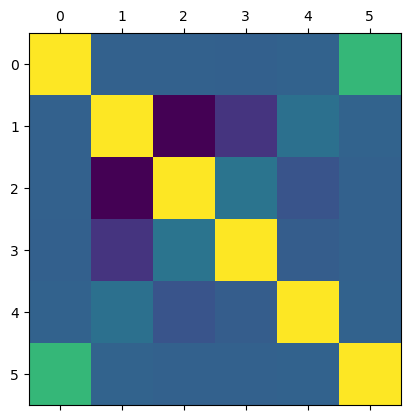

In [31]:
# Create correlation heatmap

plt.matshow(sub.corr())
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

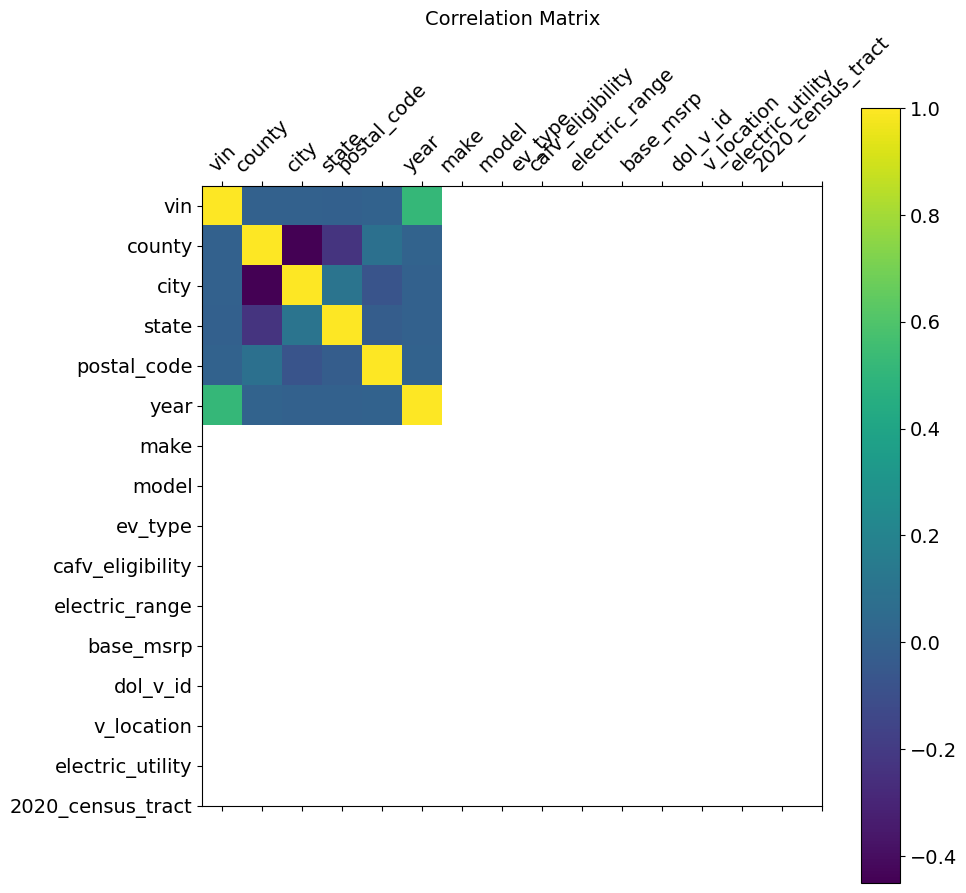

In [32]:
## Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10,10)) # figure size
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x-axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) #y-axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

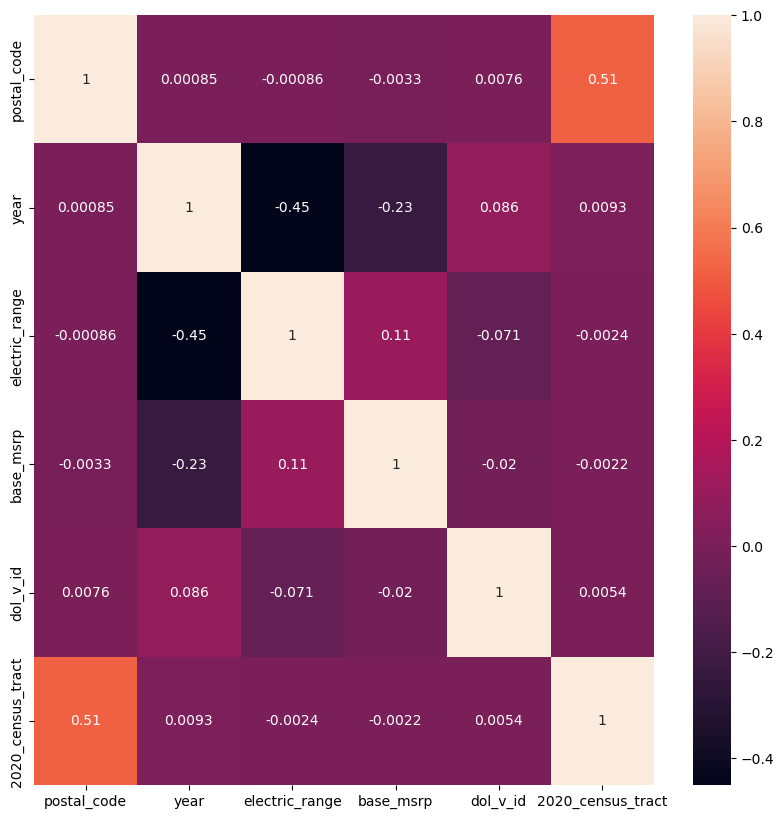

In [35]:
# Create subplot with with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create corrolation heatmap in seaborn

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

2020 census tract and postal code have a strong positive relationship. This variable is also known as "Geographic Identifier (GEOID) - I will be sure to change the name of this column because this is way easier that it's current column name. If GEOID and postal code have a positive correlation, I would assume that these two values both represent their own predefined regions, and occasionally overlap each other. 

Electric range and year have a moderate negative correlation - this indicates that the older the car, the lower the range.

base msrp and year have a weak negative relationship - older the car, lower the price.

base msrp and range have a weak positive relationship - the more expensive an EV is, the better range it will have. 

**Scatterplots:**

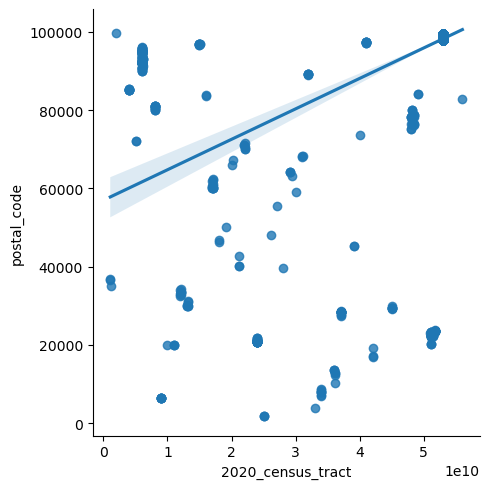

In [36]:
# Create a scatterplot for "2020_census_tract" and "postal_code" in seaborn

sns.lmplot(x = '2020_census_tract', y = 'postal_code', data = df)

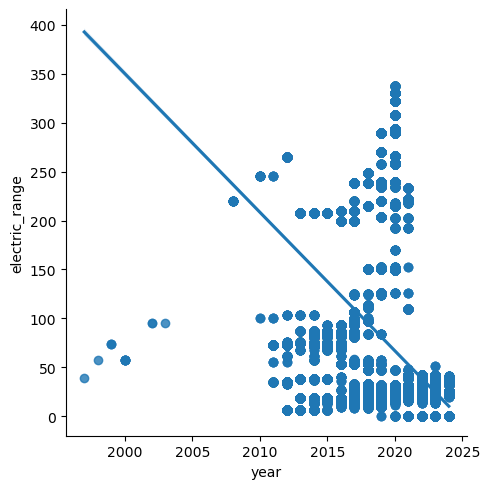

In [45]:
# Create a scatterplot for "electric_range" and "year"

sns.lmplot(x = 'year', y = 'electric_range', data = df)

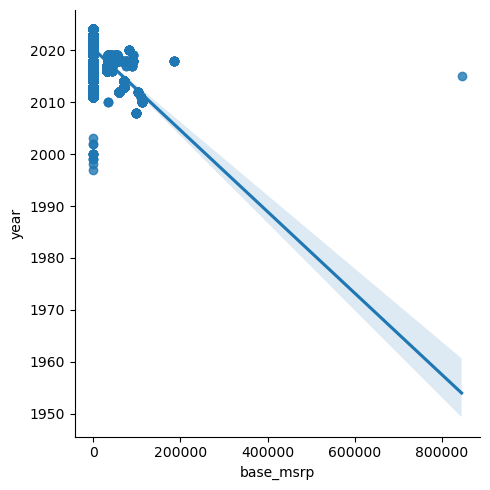

In [46]:
# Create a scatterplot for "base_msrp" and "year"

sns.lmplot(x = 'base_msrp', y = 'year', data = df)

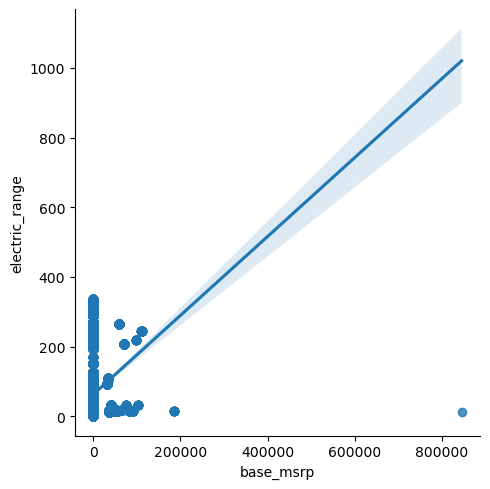

In [40]:
# Create a scatterplot for "base_msrp" and "electric_range"

sns.lmplot(x = 'base_msrp', y = 'electric_range', data = df)

**Pair Plots:**

In [42]:
# Create subset of the variables used in the above scatterplots

sub_2 = sub[['2020_census_tract', 'postal_code', 'electric_range', 'year', 'base_msrp']]

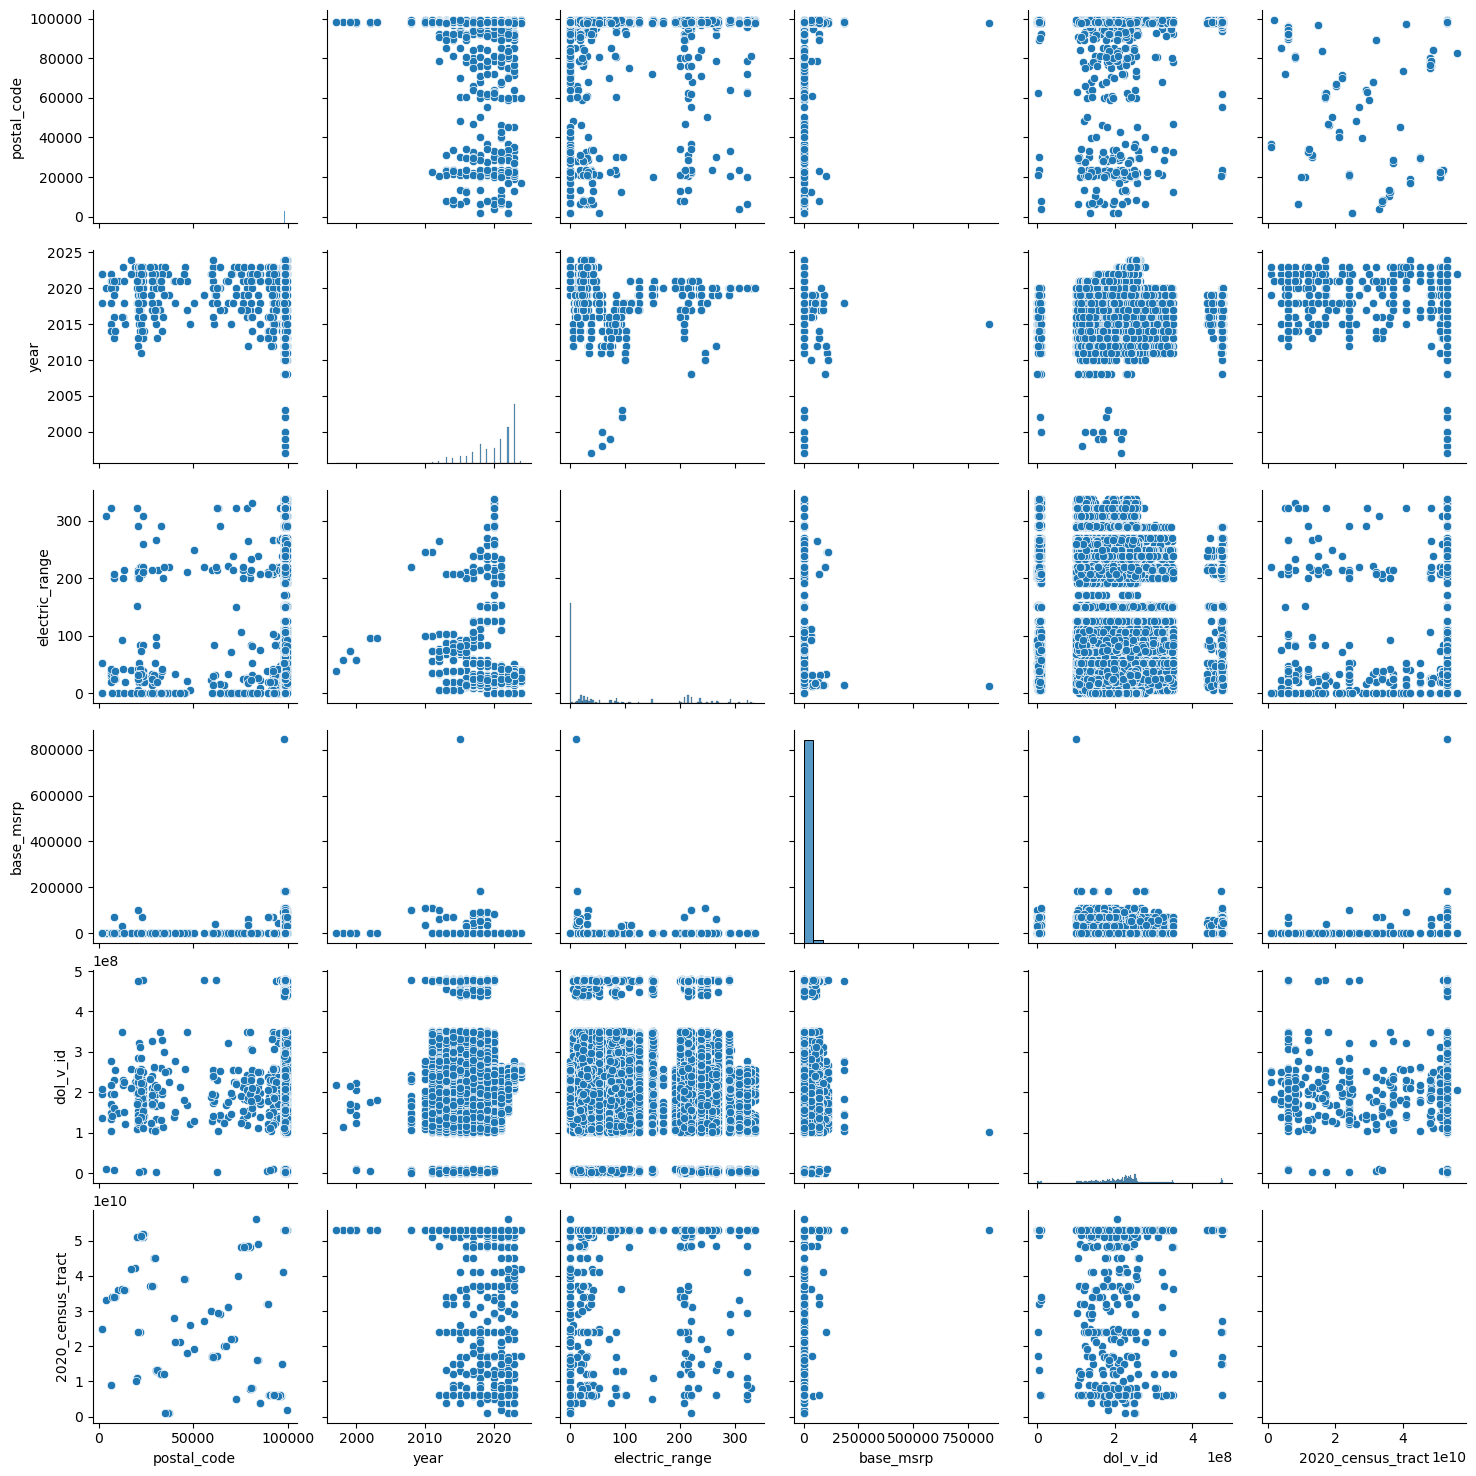

In [44]:
# Create pair plot

g = sns.pairplot(df)

**Categorical Plot:**

<Axes: xlabel='year', ylabel='Count'>

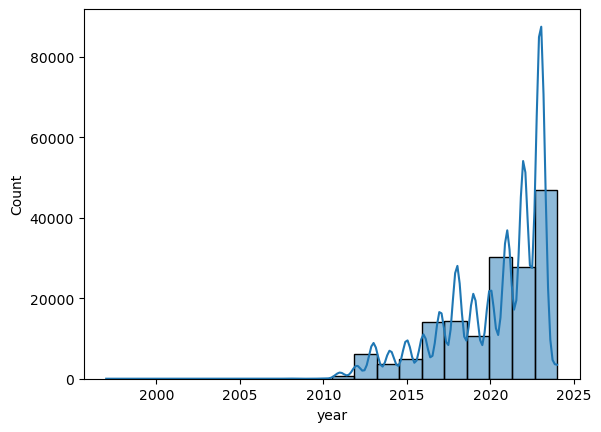

In [62]:
# Create a histogram to visualize the distribution of model years

sns.histplot(df['year'], bins = 20, kde = True)

In [68]:
# Create new categories for model year

df.loc[df['year'] < 2020, 'year_category'] = 'Old Model'

In [72]:
df.loc[(df['year'] >= 2020) & (df['year'] < 2022), 'year_category'] = 'Recent Model'

In [73]:
df.loc[df['year'] >= 2022, 'year_category'] = 'New Model'

In [74]:
df['year_category'].value_counts(dropna = False)

New Model       74636
Old Model       54691
Recent Model    30131
Name: year_category, dtype: int64

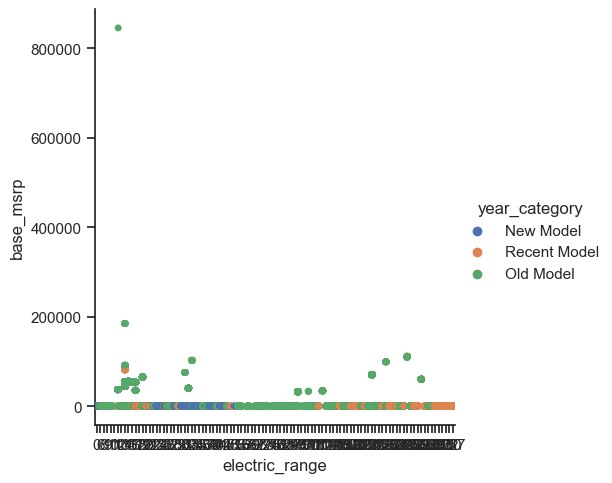

In [76]:
# Create a categorical plot in seaborn using the new model year categories

sns.set(style="ticks")
g = sns.catplot(x='electric_range', y='base_msrp', hue = 'year_category', data = df)

In [82]:
df_no_porsche = df.drop(index=df[df['base_msrp'] == 845000].index)

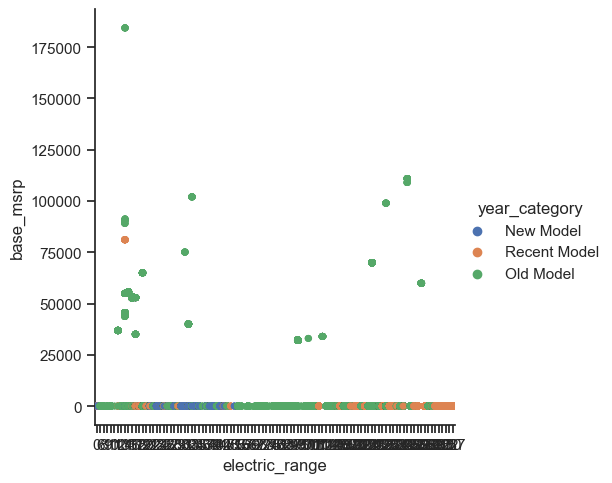

In [83]:
sns.set(style="ticks")
g = sns.catplot(x='electric_range', y='base_msrp', hue = 'year_category', data = df_no_porsche)

In [84]:
df_no_outliers = df_no_porsche.drop(index=df_no_porsche[df_no_porsche['base_msrp'] == 0].index)

In [ ]:
sns.set(style="ticks")
g = sns.catplot(x='electric_range', y='base_msrp', hue = 'year_category', data = df_no_porsche)